Library
--------------------------

In [6401]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import statistics
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Files
--------------------------

In [6402]:
data = pd.read_csv('Credit_Card_Train.csv')
data2 = pd.read_csv('Credit_Card_X_Test.csv')

Understanding Data
--------------------------

In [6403]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [6404]:
data.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [6405]:
data.shape

(483, 16)

Data Minipulation
--------------------------

In [6406]:
me = statistics.mean(data['Debt'])

for (i,row) in data.iterrows():
  data.at[i,'Debt'] = data.at[i,'Debt'] - me

  me = statistics.mean(data2['Debt'])

for (i,row) in data2.iterrows():
  data2.at[i,'Debt'] = data2.at[i,'Debt'] - me

In [6407]:
me = statistics.mean(data['Income'])

for (i,row) in data.iterrows():
  data.at[i,'Income'] = data.at[i,'Income'] - me

# me = statistics.mean(data2['Income'])

for (i,row) in data2.iterrows():
  data2.at[i,'Income'] = data2.at[i,'Income'] - me

In [6408]:
me = statistics.mean(data['Age'])

for (i,row) in data.iterrows():
  data.at[i,'Age'] = data.at[i,'Age'] - me

# me = statistics.mean(data2['Age'])

for (i,row) in data2.iterrows():
  data2.at[i,'Age'] = data2.at[i,'Age'] - me

In [6409]:
me = statistics.mean(data['CreditScore'])

for (i,row) in data.iterrows():
  data.at[i,'CreditScore'] = data.at[i,'CreditScore'] - me

# me = statistics.mean(data2['CreditScore'])

for (i,row) in data2.iterrows():
  data2.at[i,'CreditScore'] = data2.at[i,'CreditScore'] - me

In [6410]:
# data = data.assign( CreditScore2 = data.CreditScore, Debt2 = data.Debt, Income2 = data.Income, Age2 = data.Age)
# data2 = data2.assign( CreditScore2 = data2.CreditScore, Debt2 = data2.Debt, Income2 = data2.Income, Age2 = data2.Age)

In [6411]:
# data['ByBirth'] = data.Citizen == 'ByBirth'
# data2['ByBirth'] = data2.Citizen == 'ByBirth'

# data['ByOtherMeans'] = data.Citizen == 'ByOtherMeans'
# data2['ByOtherMeans'] = data2.Citizen == 'ByOtherMeans'

# data['Temporary'] = data.Citizen == 'Temporary'
# data2['Temporary'] = data2.Citizen == 'Temporary'

In [6412]:
# data['Energy'] = data.Industry == 'Energy'
# data2['Energy'] = data2.Industry == 'Energy'

# data['Industrials'] = data.Industry == 'Industrials'
# data2['Industrials'] = data2.Industry == 'Industrials'

# data['ConsumerStaples'] = data.Industry == 'ConsumerStaples'
# data2['ConsumerStaples'] = data2.Industry == 'ConsumerStaples'

# data['Materials'] = data.Industry == 'Materials'
# data2['Materials'] = data2.Industry == 'Materials'

# data['Healthcare'] = data.Industry == 'Healthcare'
# data2['Healthcare'] = data2.Industry == 'Healthcare'

# data['ConsumerDiscretionary'] = data.Industry == 'ConsumerDiscretionary'
# data2['ConsumerDiscretionary'] = data2.Industry == 'ConsumerDiscretionary'

In [6413]:
# arr = ['ConsumerStaples' ,'ConsumerDiscretionary' , 'Industrials']
# for (i,row) in data.iterrows():
#   if (row.ZipCode in arr):
#     data['other'] = True
#   else:
#     data['other'] = False


# # arr = ['ConsumerStaples' ,'ConsumerDiscretionary' , 'Industrials']
# for (i,row) in data2.iterrows():
#   if (row.ZipCode in arr):
#     data2['other'] = True
#   else:
#     data2['other'] = False

In [6414]:
workField = set(data['Industry'])
workField = list(workField)

for (i,row) in data.iterrows():
  data.at[i,'Industry'] = workField.index(row.Industry)

for (i,row) in data2.iterrows():
  if (row.Industry not in workField):
    workField.append(row.Industry)
  data2.at[i,'Industry'] = workField.index(row.Industry)

In [6415]:
data2.drop("id", axis=1, inplace=True)

In [6416]:
Zcode = set(data['ZipCode'])
Zcode = list(Zcode)

for (i,row) in data.iterrows():
  data.at[i,'ZipCode'] = Zcode.index(row.ZipCode) 

for (i,row) in data2.iterrows():
  if (row.ZipCode not in Zcode):
    Zcode.append(row.ZipCode)
  data2.at[i,'ZipCode'] = Zcode.index(row.ZipCode) 

In [6417]:
# data.drop("ZipCode", axis=1, inplace=True)
# data2.drop("ZipCode", axis=1, inplace=True)

In [6418]:
data.drop("Industry", axis=1, inplace=True)
data2.drop("Industry", axis=1, inplace=True)

In [6419]:
data.drop("Ethnicity", axis=1, inplace=True)
data2.drop("Ethnicity", axis=1, inplace=True)

In [6420]:
data.drop("Citizen", axis=1, inplace=True)
data2.drop("Citizen", axis=1, inplace=True)

TEST
--------------------------

In [6421]:
# data.drop("YearsEmployed", axis=1, inplace=True)
# data2.drop("YearsEmployed", axis=1, inplace=True)

In [6422]:
# data.drop("Energy", axis=1, inplace=True)
# data2.drop("Energy", axis=1, inplace=True)

# data.drop("Materials", axis=1, inplace=True)
# data2.drop("Materials", axis=1, inplace=True)

# data.drop("Healthcare", axis=1, inplace=True)
# data2.drop("Healthcare", axis=1, inplace=True)

In [6423]:
data.drop("Gender", axis=1, inplace=True)
data2.drop("Gender", axis=1, inplace=True)

data.drop("DriversLicense", axis=1, inplace=True)
data2.drop("DriversLicense", axis=1, inplace=True)

data.drop("Married", axis=1, inplace=True)
data2.drop("Married", axis=1, inplace=True)

data.drop("BankCustomer", axis=1, inplace=True)
data2.drop("BankCustomer", axis=1, inplace=True)

data.drop("Employed", axis=1, inplace=True)
data2.drop("Employed", axis=1, inplace=True)

data.drop("CreditScore", axis=1, inplace=True)
data2.drop("CreditScore", axis=1, inplace=True)

data.drop("ZipCode", axis=1, inplace=True)
data2.drop("ZipCode", axis=1, inplace=True)

# data.drop("YearsEmployed", axis=1, inplace=True)
# data2.drop("YearsEmployed", axis=1, inplace=True)

# data.drop("Age", axis=1, inplace=True)
# data2.drop("Age", axis=1, inplace=True)

In [6424]:
data

,Age,Debt,YearsEmployed,PriorDefault,Income,Approved
0,-0.691863,-4.871077,1.250,1,-1191,1
1,27.148137,-0.036570,3.040,1,-631,1
2,-7.021863,-3.996570,1.500,1,-367,1
3,-3.691863,-2.956570,3.750,1,-1188,1
4,-11.351863,1.128430,1.710,1,-1191,1
...,...,...,...,...,...,...
478,-8.771863,7.003430,0.415,0,-1191,0
479,-5.021863,-1.786570,0.085,0,-1191,0
480,-14.601863,-3.996570,0.165,0,-1156,0
481,-8.021863,-1.331570,0.415,0,-1111,0


Predict
--------------------------

In [6425]:
X = data.drop("Approved", axis=1)
y = data["Approved"]

In [6426]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= .6)

In [6427]:
classifier= DecisionTreeClassifier(criterion='gini')
#Check Random Forest Please

In [6428]:
# from sklearn.ensemble import RandomForestClassifier
# classifier=RandomForestClassifier(n_estimators=11)

In [6429]:
# from sklearn.model_selection import train_test_split
# classifier = KNeighborsClassifier(n_neighbors=3)

In [6430]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix

# classifier = LogisticRegression(penalty='l1',solver='liblinear', C = 4)
# #The Classfier i Submited

In [6431]:
# # classifier = RandomForestClassifier(n_estimators=950,
# #                               max_depth=21,
# #                               min_samples_leaf=16
# #                               )
# classifier = RandomForestClassifier(n_estimators=950)

In [6432]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [6433]:
y_predict = classifier.predict(data2)

In [6434]:
pd.DataFrame(y_predict).to_csv('predictied.csv')

In [6435]:
# y_predict.sum()

In [6436]:
y_predict = classifier.predict(x_test)

In [6437]:
metrics.accuracy_score(y_test, y_predict)

0.7620689655172413

In [6438]:
feature_imp = pd.Series(classifier.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
feature_imp

PriorDefault     0.557061
Debt             0.172217
YearsEmployed    0.118171
Age              0.097299
Income           0.055252
dtype: float64

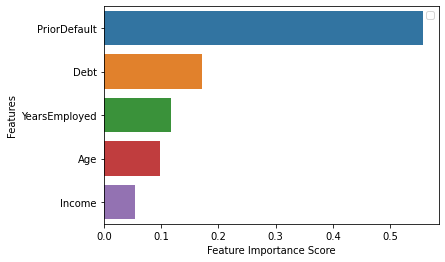

In [6439]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# plt.title("Visualizing Important Features")
plt.legend()
plt.show()